In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
train = pd.read_csv('../X_train.csv')
target = pd.read_csv('../y_train.csv')
test = pd.read_csv('../X_test.csv')

In [3]:
# No missing values :)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [4]:
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [5]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [6]:
len(test['series_id'].unique())

3816

In [7]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [8]:
print(train.shape, target.shape, test.shape)

(487680, 13) (3810, 3) (488448, 13)


In [9]:
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [10]:
train.head(1)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.10765,0.017561,0.000767,-0.74857,2.103,-9.7532


In [11]:
# Mergin target dataframe in train
f_train = pd.merge(train, target)
f_test = test

In [12]:
f_train.head(1)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.10765,0.017561,0.000767,-0.74857,2.103,-9.7532,13,fine_concrete


In [13]:
f_test.head(1)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,0,-0.025773,-0.98864,-0.14801,0.00335,-0.006524,-0.001071,-0.02739,0.10043,4.2061,-5.5439


In [14]:
len(f_test['series_id'].unique())

3816

In [15]:
final_train = f_train.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,13]]
final_test = f_test.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]]

In [16]:
final_train.head(1)

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface
0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.10765,0.017561,0.000767,-0.74857,2.103,-9.7532,fine_concrete


In [17]:
final_test.head(1)

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,-0.025773,-0.98864,-0.14801,0.00335,-0.006524,-0.001071,-0.02739,0.10043,4.2061,-5.5439


In [18]:
len(final_test['series_id'].unique())

3816

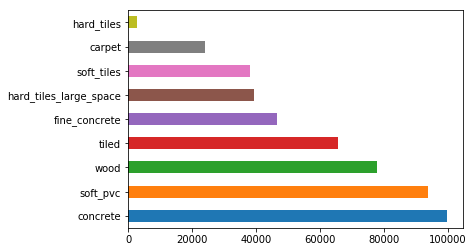

In [19]:
# Classes are not balanced, each class has different count
final_train['surface'].value_counts().plot(kind='barh')

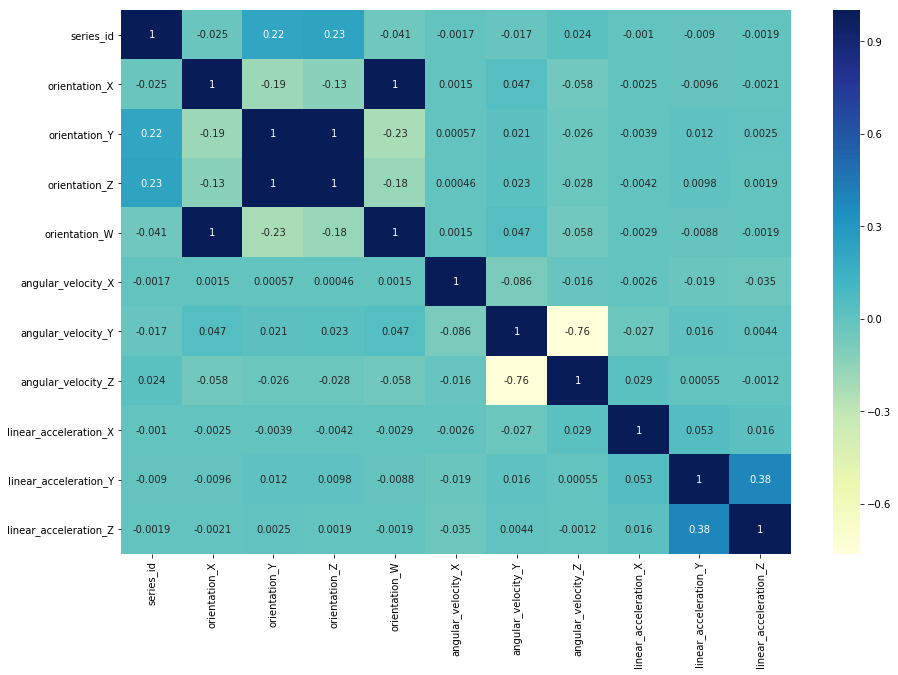

In [20]:
# Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(final_train.corr(), annot=True, cmap='YlGnBu')

In [21]:
# Feature Engineering, we have multiple series_id corresponding to different measurements. We will take single measurement for
# corresponding series_id. This single measurement will be chosen as max, min, abs, std, mean etc.

columns = ['orientation', 'angular_velocity', 'linear_acceleration']
for i in columns:
    if(i == 'orientation'):
        final_train[i] = final_train[i+'_X'] + final_train[i+'_Y'] + final_train[i+'_Z'] + final_train[i+'_W']
        final_test[i] = final_test[i+'_X'] + final_test[i+'_Y'] + final_test[i+'_Z'] + final_test[i+'_W']
    else:
        final_train[i] = final_train[i+'_X'] + final_train[i+'_Y'] + final_train[i+'_Z']
        final_test[i] = final_test[i+'_X'] + final_test[i+'_Y'] + final_test[i+'_Z']

In [22]:
final_train.head(1)

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface,orientation,angular_velocity,linear_acceleration
0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.10765,0.017561,0.000767,-0.74857,2.103,-9.7532,fine_concrete,-1.60373,0.125978,-8.39877


In [23]:
final_test.head(1)

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,orientation,angular_velocity,linear_acceleration
0,0,-0.025773,-0.98864,-0.14801,0.00335,-0.006524,-0.001071,-0.02739,0.10043,4.2061,-5.5439,-1.159073,-0.034985,-1.23737


In [24]:
len(final_test['series_id'].unique())

3816

In [25]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [26]:
# Making columns for max, min, mean, median, abs_max, std, quartile(25%), quartile(50%), quartile(75%)
# This will take some time, be patient :)
columns = final_train.columns
for i in columns[1:]:
    if(i != 'surface'):
        train_data[i+'_max'] = final_train.groupby(by='series_id')[i].max()
        test_data[i+'_max'] = final_test.groupby(by='series_id')[i].max()
        
        train_data[i+'_min'] = final_train.groupby(by='series_id')[i].min()
        test_data[i+'_min'] = final_test.groupby(by='series_id')[i].min()
        
        train_data[i+'_mean'] = final_train.groupby(by='series_id')[i].mean()
        test_data[i+'_mean'] = final_test.groupby(by='series_id')[i].mean()
        
        train_data[i+'_median'] = final_train.groupby(by='series_id')[i].median()
        test_data[i+'_median'] = final_test.groupby(by='series_id')[i].median()
        
        train_data[i+'_quantile_25'] = final_train.groupby(by='series_id')[i].quantile(0.25)
        test_data[i+'_quantile_25'] = final_test.groupby(by='series_id')[i].quantile(0.25)
        
        train_data[i+'_quantile_50'] = final_train.groupby(by='series_id')[i].quantile(0.5)
        test_data[i+'_quantile_50'] = final_test.groupby(by='series_id')[i].quantile(0.5)
        
        train_data[i+'_quantile_75'] = final_train.groupby(by='series_id')[i].quantile(0.75)
        test_data[i+'_quantile_75'] = final_test.groupby(by='series_id')[i].quantile(0.75)
        
        train_data[i+'_abs_max'] = final_train.groupby(by='series_id')[i].apply(lambda x: np.max(np.abs(x)))
        test_data[i+'_abs_max'] = final_test.groupby(by='series_id')[i].apply(lambda x: np.max(np.abs(x)))
        
        train_data[i+'_std'] = final_train.groupby(by='series_id')[i].std()
        test_data[i+'_std'] = final_test.groupby(by='series_id')[i].std()
        
    else:
        train_data['surface'] = final_train.groupby(by='series_id')[i].max()

In [27]:
train_data.head()

,orientation_X_max,orientation_X_min,orientation_X_mean,orientation_X_median,orientation_X_quantile_25,orientation_X_quantile_50,orientation_X_quantile_75,orientation_X_abs_max,orientation_X_std,orientation_Y_max,...,angular_velocity_std,linear_acceleration_max,linear_acceleration_min,linear_acceleration_mean,linear_acceleration_median,linear_acceleration_quantile_25,linear_acceleration_quantile_50,linear_acceleration_quantile_75,linear_acceleration_abs_max,linear_acceleration_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.75822,-0.75953,-0.758666,-0.758530,-0.758927,-0.758530,-0.758367,0.75953,0.000363,-0.63306,...,0.054317,-1.28960,-12.35360,-6.072777,-5.908943,-7.654925,-5.908943,-4.575425,12.35360,2.435261
1,-0.95837,-0.95896,-0.958606,-0.958595,-0.958720,-0.958595,-0.958480,0.95896,0.000151,0.24270,...,0.114295,5.53280,-18.65331,-6.498839,-6.629450,-8.726562,-6.629450,-4.042725,18.65331,3.483174
2,-0.50944,-0.51434,-0.512057,-0.512035,-0.513110,-0.512035,-0.510947,0.51434,0.001377,-0.84490,...,0.070696,-0.07600,-13.18580,-6.359327,-6.265565,-8.452710,-6.265565,-4.308499,13.18580,2.669858
3,-0.93884,-0.93968,-0.939169,-0.939170,-0.939340,-0.939170,-0.938960,0.93968,0.000227,0.31147,...,0.181952,10.01550,-28.17420,-6.591451,-5.599050,-11.117950,-5.599050,-2.397842,28.17420,6.595729
4,-0.88673,-0.89689,-0.891301,-0.890940,-0.893795,-0.890940,-0.888750,0.89689,0.002955,0.43740,...,0.056376,-3.02387,-10.33257,-6.454662,-6.402965,-7.342180,-6.402965,-5.399779,10.33257,1.541455


In [28]:
test_data.head()

,orientation_X_max,orientation_X_min,orientation_X_mean,orientation_X_median,orientation_X_quantile_25,orientation_X_quantile_50,orientation_X_quantile_75,orientation_X_abs_max,orientation_X_std,orientation_Y_max,...,angular_velocity_std,linear_acceleration_max,linear_acceleration_min,linear_acceleration_mean,linear_acceleration_median,linear_acceleration_quantile_25,linear_acceleration_quantile_50,linear_acceleration_quantile_75,linear_acceleration_abs_max,linear_acceleration_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.025156,-0.026418,-0.025810,-0.025748,-0.026019,-0.025748,-0.025585,0.026418,0.000284,-0.98854,...,0.093046,2.74930,-16.250800,-6.306933,-6.343710,-8.848962,-6.343710,-4.386500,16.250800,3.394998
1,-0.931480,-0.933720,-0.932288,-0.932115,-0.932640,-0.932115,-0.931790,0.933720,0.000564,0.33227,...,0.088687,0.89657,-15.714600,-6.400116,-5.896780,-8.568615,-5.896780,-4.499305,15.714600,2.787412
2,-0.227130,-0.231410,-0.230186,-0.230600,-0.231022,-0.230600,-0.229605,0.231410,0.001054,0.96217,...,0.133641,5.92650,-16.639900,-6.308825,-6.452090,-10.061555,-6.452090,-2.968350,16.639900,4.695682
3,0.167500,0.163320,0.164661,0.164260,0.163672,0.164260,0.165477,0.167500,0.001182,0.97551,...,0.028734,-3.95384,-8.143260,-6.226667,-6.310002,-6.738323,-6.310002,-5.807358,8.143260,0.791152
4,-0.236370,-0.269380,-0.253600,-0.253900,-0.262265,-0.253900,-0.245258,0.269380,0.009763,0.96018,...,0.033563,-4.88741,-8.105109,-6.590513,-6.664639,-7.084915,-6.664639,-6.153871,8.105109,0.738247


In [29]:
len(test_data)

3816

In [30]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  

In [40]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)
rfc.fit(train_data.drop('surface', axis=1), train_data['surface'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
accuracies = cross_val_score(rfc,train_data.drop('surface', axis=1), train_data['surface'], cv = 10)

In [42]:
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.83376623 0.88802083 0.82506527 0.87958115 0.91338583 0.87926509
 0.88188976 0.89182058 0.87037037 0.86968085]
0.8732845977407295
0.02495314333105009


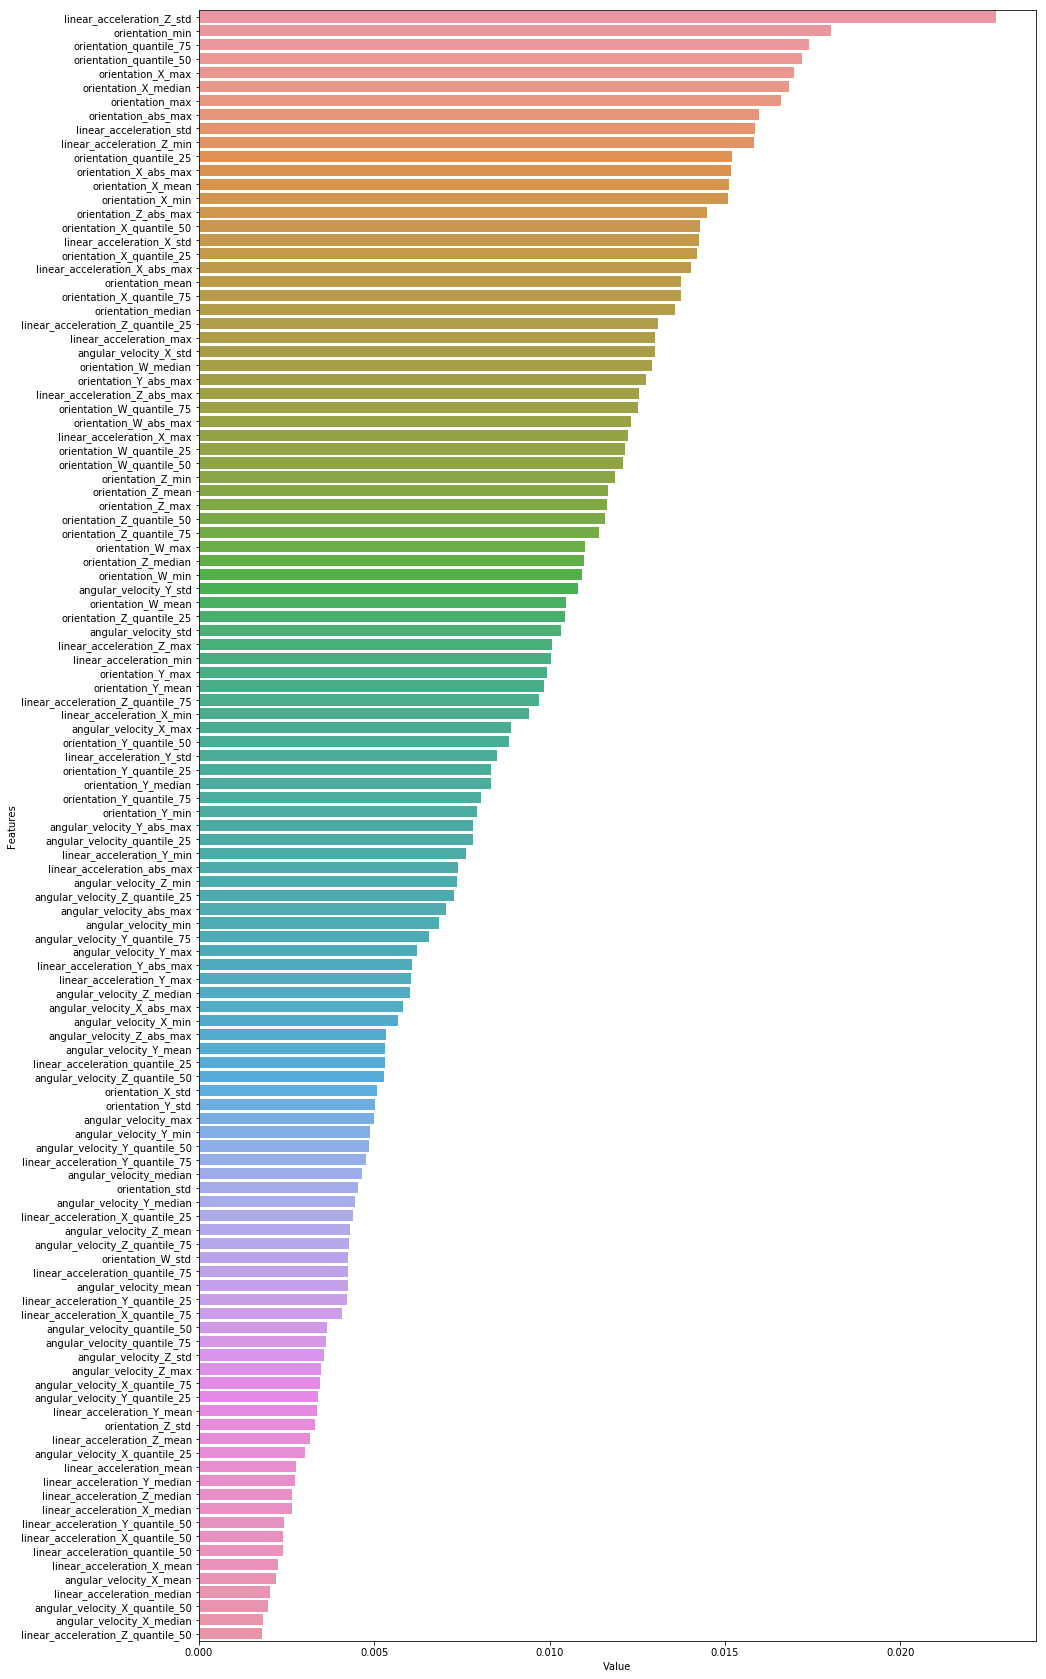

In [43]:
# Plotting the feature importance
plt.figure(figsize=(15, 30))
importance = pd.DataFrame({'Value':rfc.feature_importances_, 'Features':train_data.drop('surface', axis=1).columns})
importance.sort_values('Value', ascending=False, inplace=True)
sns.barplot(x='Value', y='Features', data=importance)

In [44]:
# Predictions on test set
y_pred = rfc.predict(test_data)

In [45]:
df = pd.DataFrame(data=y_pred, index=test_data.index, columns=['surface'])

In [46]:
df.head()

,surface
series_id,
0,hard_tiles_large_space
1,carpet
2,tiled
3,soft_tiles
4,soft_tiles


In [47]:
df.to_csv('../Submission2.csv')